# Dados Campus Sertãozinho


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
dados = pd.read_csv('Relatorio_novo_1.CSV')

In [4]:
dados = dados.loc[dados['Modalidade'] != "FIC"]

In [5]:
dados = dados.drop(["Matrícula"],axis = 1)

# Filtros

In [6]:
dados['Modalidade'].value_counts()

Técnico Integrado                   1569
Licenciatura                        1413
Tecnologia                          1251
Técnico Concomitante/Subsequente    1061
Bacharelado                          875
Técnico Integrado EJA                821
Mestrado                             383
Técnico Subsequente                   97
Name: Modalidade, dtype: int64

In [7]:
dados = dados.loc[dados['Modalidade'] == 'Técnico Integrado']
dados

,#,Ano de Ingresso,Deficiência,Descrição do Curso,Estado,Etnia/Raça/Cor,Forma de Ingresso,Modalidade,Nacionalidade,Renda Per Capita,Sexo,Situação no Curso,Tipo de Escola de Origem
2,3,2015,Sem Necessidade Especial,TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO,SP,Parda,Escola Pública + PPI,Técnico Integrado,Brasileira,"1,17",M,Concluído,Pública
10,11,2008,Sem Necessidade Especial,TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Integrado,Brasileira,NaN,M,Transferido Externo,Pública
16,17,2007,Sem Necessidade Especial,TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO E...,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Integrado,Brasileira,NaN,M,Matriculado,Pública
24,25,2011,Sem Necessidade Especial,TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Integrado,Brasileira,NaN,F,Concluído,Pública
30,31,2013,Sem Necessidade Especial,TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Integrado,Brasileira,NaN,F,Concluído,Pública
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11892,11893,2016,Sem Necessidade Especial,TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO,SP,Branca,Escola Pública + Renda,Técnico Integrado,Brasileira,"0,46",F,Concluído,Pública
11903,11904,2017,Sem Necessidade Especial,TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO E...,SP,Branca,Ampla Concorrência (Vestibular),Técnico Integrado,Brasileira,"0,43",M,Concluído,Pública
11905,11906,2015,Sem Necessidade Especial,TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO E...,SP,Amarela,Ampla Concorrência (Vestibular),Técnico Integrado,Brasileira,NaN,M,Concluído,Pública
11907,11908,2010,Sem Necessidade Especial,TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Integrado,Brasileira,NaN,F,Transferido Externo,Pública


# Número de alunos

In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
import matplotlib.pyplot as plt

In [10]:
dados['Ano de Ingresso'].value_counts()


2012    126
2014    122
2023    120
2007    115
2010     94
2008     89
2009     85
2015     83
2013     83
2018     82
2019     82
2022     82
2020     82
2017     82
2011     81
2021     81
2016     80
Name: Ano de Ingresso, dtype: int64

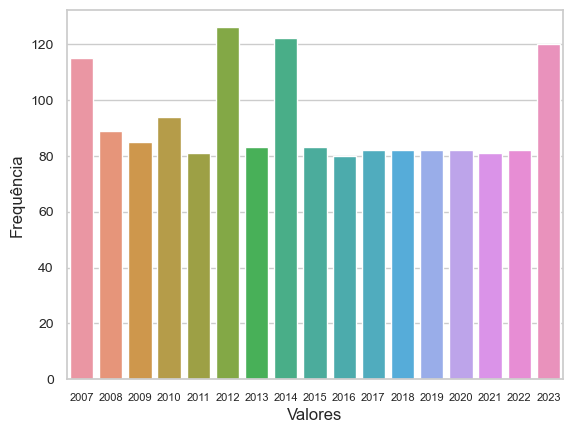

<Figure size 1200x1000 with 0 Axes>

In [54]:
# Para começar a análise dos dados foi relevante enxergar o número de alunos em geral no campus Sertãozinho com o decorrer dos anos.
sns.countplot(x = dados['Ano de Ingresso'])
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.figure(figsize= (12,10))
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 10

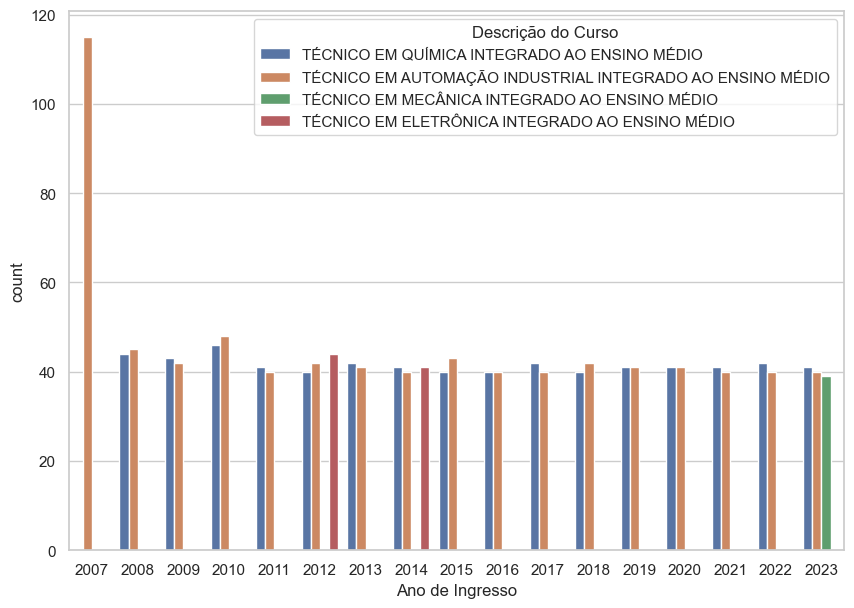

In [66]:
plt.figure(figsize= (10,7))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Ano de Ingresso', hue='Descrição do Curso')
plt.show()

# Raça

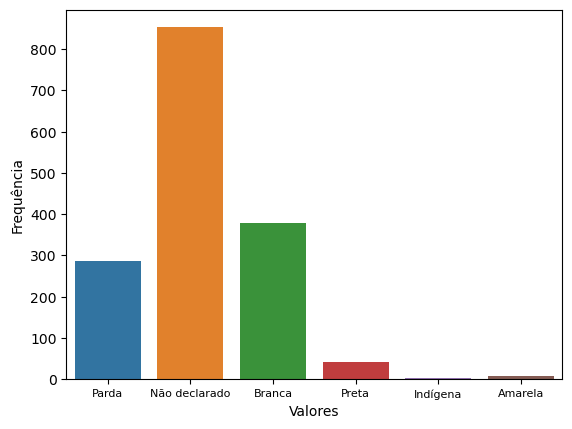

In [12]:
# A primeira informação buscada na análise foi relacionada com raça/etnia/cor, no primeiro gráfico
# é possível observar a quantidade de alunos de cada raça/etnia/cor e também os que não declararam no campus Sertãozinho. 
# Podemos perceber graficamente que o número de brancos é alto em comparação com o restante.
sns.countplot(x = dados['Etnia/Raça/Cor'])
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

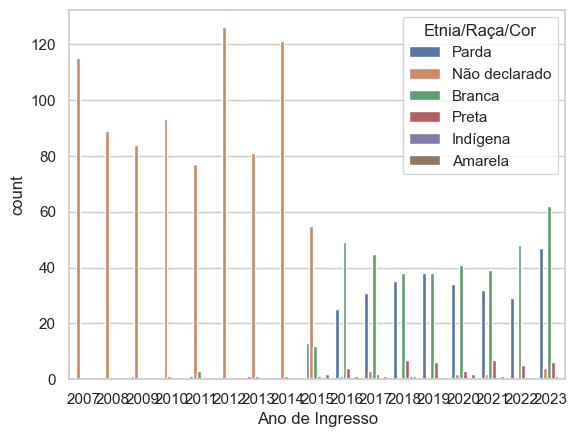

In [55]:
# Após analisarmos a quantidade bruta de alunos com relação a raça/cor/etnia, agora podemos analisar no gráfico 
# a quantidade através dos anos, é possível notar que até dois mil e quinze o alunos quase não se declaravam, após esse ano é possível
# ver que há um aumento significativo no nos alunos se declarando e uma clara diminuição nos que não se declaram.

sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Ano de Ingresso', hue='Etnia/Raça/Cor')

plt.show()

In [14]:
dados['Etnia/Raça/Cor'].value_counts()

Não declarado    853
Branca           378
Parda            287
Preta             41
Amarela            8
Indígena           2
Name: Etnia/Raça/Cor, dtype: int64

# Tipo de escolaridade

<Axes: xlabel='Tipo de Escola de Origem', ylabel='count'>

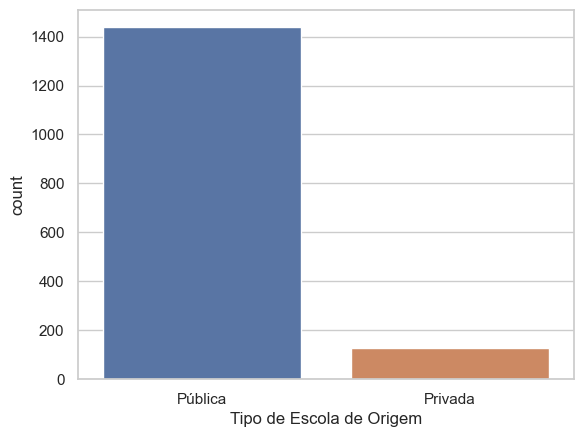

In [15]:
# Neste novo tópico será possivel analisar a escolaridade de origem dos alunos, sendo pública ou privada, uma informação 
# importante para os próximos passos do projeto. No gráfico a seguir existe uma diferença grande entre público e privado, com público sendo maior. 
sns.countplot(x = dados['Tipo de Escola de Origem'])

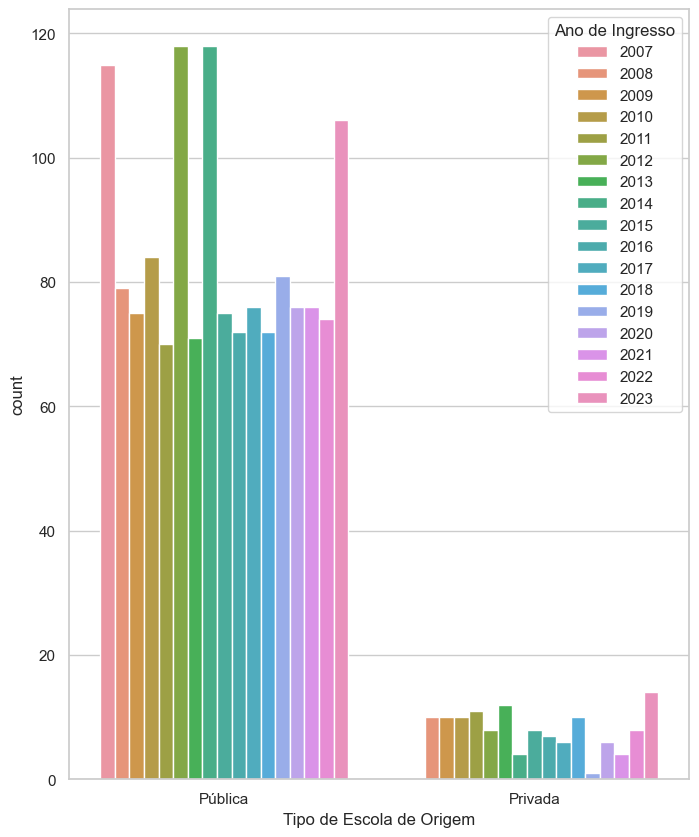

In [16]:
# No gráfico a seguir é possível ver o número de alunos e suas escolaridades de origem ao decorrer dos anos, é interessante analisar
# um aumento de ambas, pública e privada, nos anos de 2021 e 2022, anos de pandemia.
plt.figure(figsize= (8,10))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Tipo de Escola de Origem', hue='Ano de Ingresso')
plt.show()

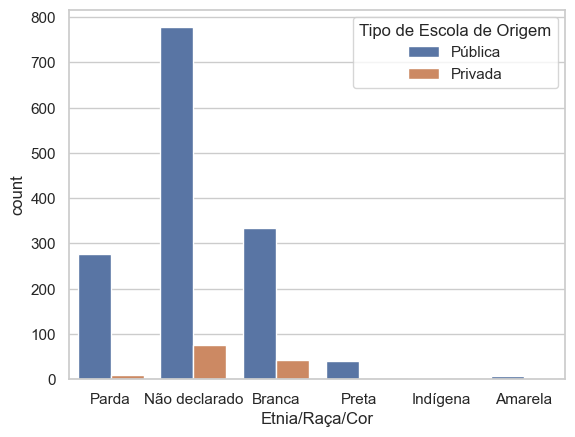

In [17]:
# Outra informação batante relevante para este estudo é mostrado no gráfico abaixo, onde existe uma disparidade alta entre 
# escolas de origem pública e privada, principalmente entre os alunos brancos.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Etnia/Raça/Cor', hue='Tipo de Escola de Origem')
plt.show()

In [18]:
dados['Descrição do Curso'].value_counts()

TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO ENSINO MÉDIO    780
TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO                 665
TÉCNICO EM ELETRÔNICA INTEGRADO AO ENSINO MÉDIO               85
TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO                 39
Name: Descrição do Curso, dtype: int64

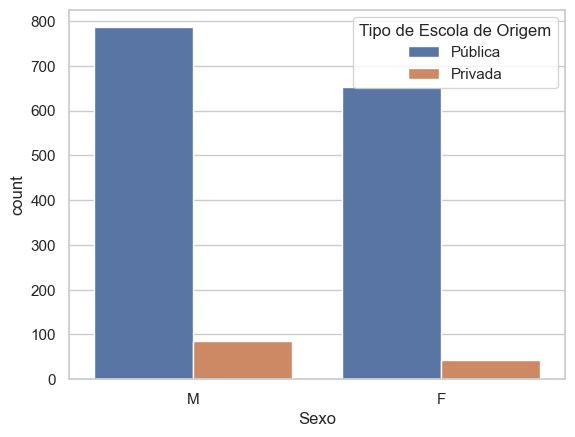

In [19]:
# Nas próximas conclusões que foram possíveis tirar a partir do gráfico abaixo, vemos a diferença entre
# o número de alunos de gênero masculino e feminino com relção a escola de origem, sendo bem perceptível um equilibrio.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Tipo de Escola de Origem')
plt.show()

# Gênero

<Axes: xlabel='Sexo', ylabel='count'>

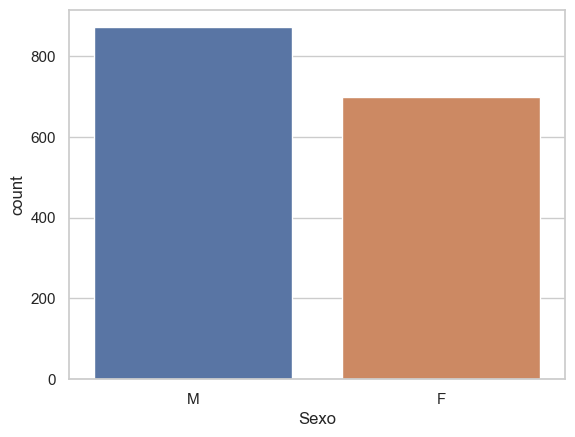

In [20]:
# Agora será feita uma ánalise sobre questões de gênero. Primeiro o gráfico a seguir mostra um equilíbrio entre o número geral de 
# homens e mulheres no campus. Um adendo importante é que os dados se resumem apenas a gênero masculino e feminino. 
sns.countplot(x = dados['Sexo'])

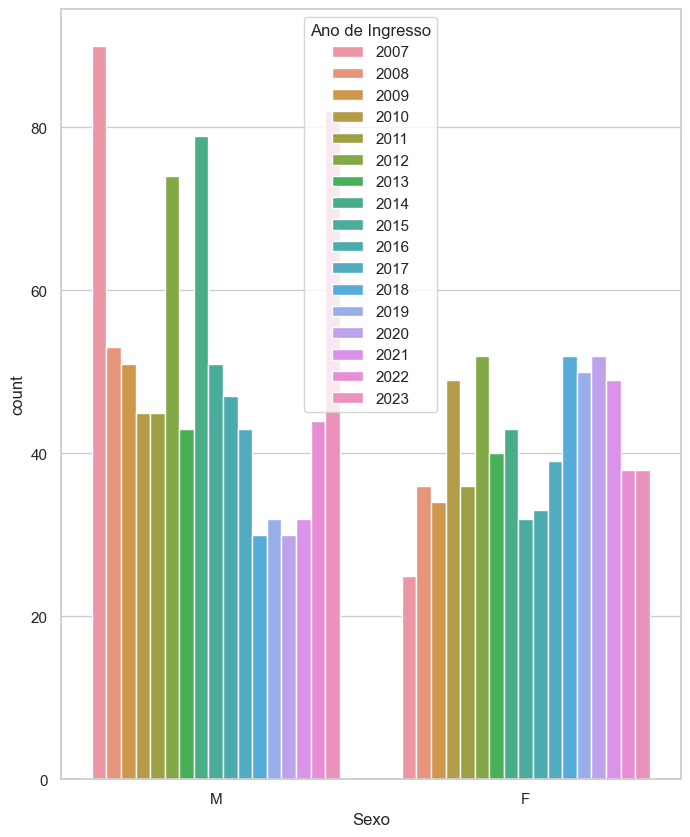

In [21]:
# É possível concluir a partir do próximo gráfico e dos anteriores também, um aumente relevante de alunos, de ambos os gêneros 
# analisados, nos anos de pandemia, pricnipalamente para mulheres no ano de dois mil e vinte um.
plt.figure(figsize= (8,10))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Ano de Ingresso')
plt.show()

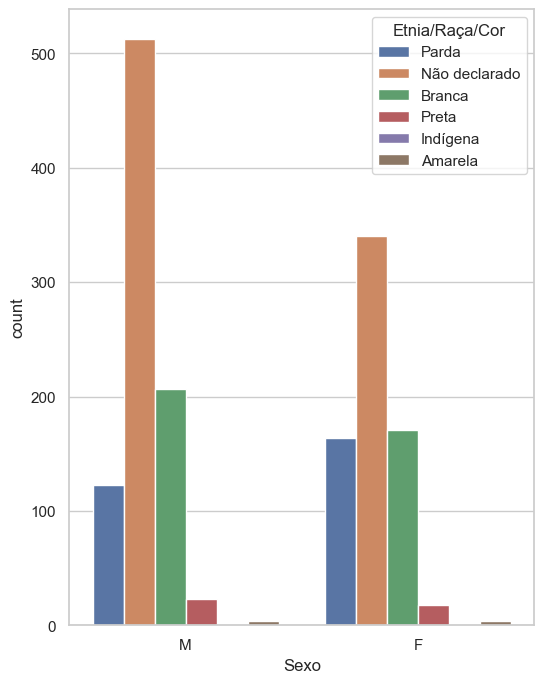

In [22]:
# Com relação a raça, o gráfico a seguir mostra, assim como analisado anteriormente, um grande número de alunos brancos e seguidos 
# por alunos pardos com uma certa distância.
plt.figure(figsize= (6,8))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Etnia/Raça/Cor')
plt.show()

# Evasão

In [23]:
dados['Situação no Curso'].value_counts()

Concluído                          813
Matriculado                        464
Transferido Externo                111
Cancelado                           98
Evasão                              73
Cancelamento Compulsório             4
Matrícula Vínculo Institucional      4
Transferido Interno                  2
Name: Situação no Curso, dtype: int64

In [24]:
dados_Evas = dados[dados['Situação no Curso']=='Evasão']

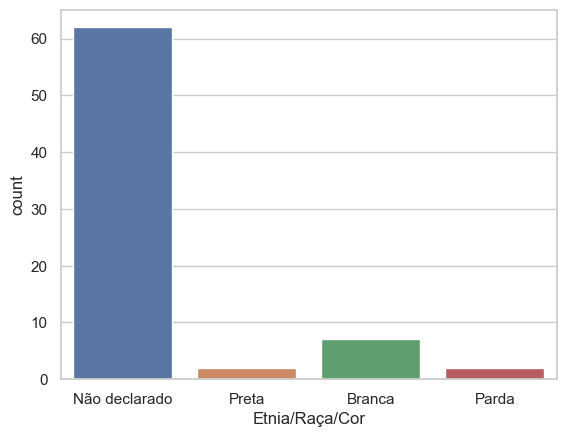

In [25]:
# O tópico de evasão é um dos mais importantes do projeto, nele pode-se observar algumas informações que serão muito importante para as 
# conclusões, no gráfico a seguir foi filtrado uma base de dados só com os alunos que evadiram em relação a raça/etnia/cor.
sns.countplot(x = dados_Evas['Etnia/Raça/Cor'])
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 15

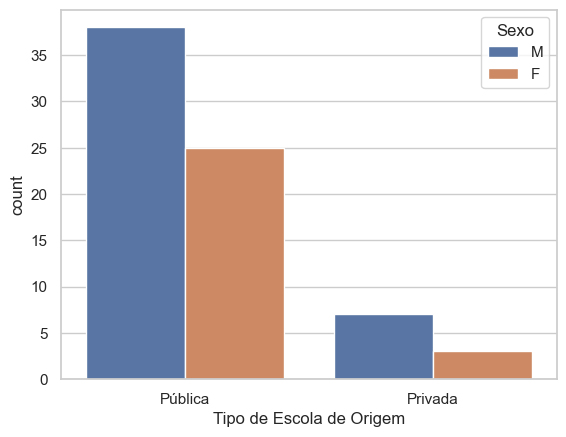

In [26]:
# Agora a análise de evasão é feita pela escola de origem e gênero, é possível perceber um alto número de alunos de origem de escola pública e
# homens que evadem mais. 
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Evas, x='Tipo de Escola de Origem', hue='Sexo')
plt.show()

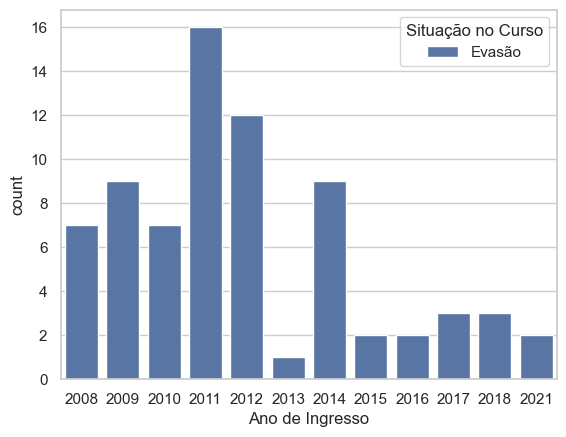

In [27]:
# Agora será analisado o número geral de evadidos, em todos os cursos e modalidades do campus, ao passar dos anos, 
# peecebendo um ápice em dois mil e dezoito e uma queda nos anos de pandemia, dois mil e vinte e vinte um.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Evas, x='Ano de Ingresso', hue='Situação no Curso')
plt.show()

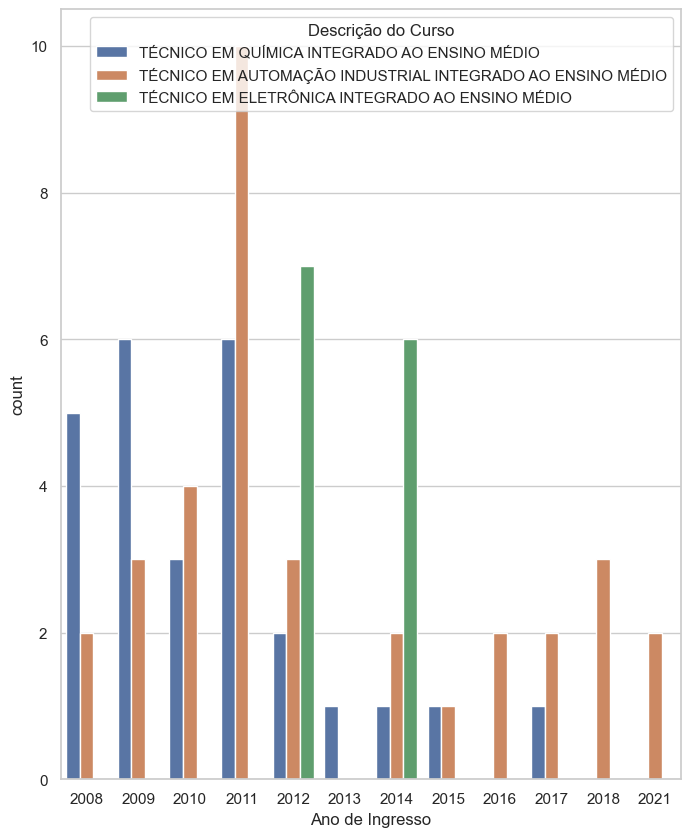

In [60]:
# Agora será analisado o número geral de evadidos, em todos os cursos e modalidades do campus, ao passar dos anos, 
# peecebendo um ápice em dois mil e dezoito e uma queda nos anos de pandemia, dois mil e vinte e vinte um.
plt.figure(figsize= (8,10))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Evas, x='Ano de Ingresso', hue='Descrição do Curso')
plt.show()

In [57]:
dados['Descrição do Curso'].value_counts()

TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO ENSINO MÉDIO    780
TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO                 665
TÉCNICO EM ELETRÔNICA INTEGRADO AO ENSINO MÉDIO               85
TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO                 39
Name: Descrição do Curso, dtype: int64

# Deficiência

In [29]:
dados_Def = dados[dados['Deficiência']=='PCD']

In [30]:
dados['Deficiência'].value_counts()

Sem Necessidade Especial    1562
PCD                            7
Name: Deficiência, dtype: int64

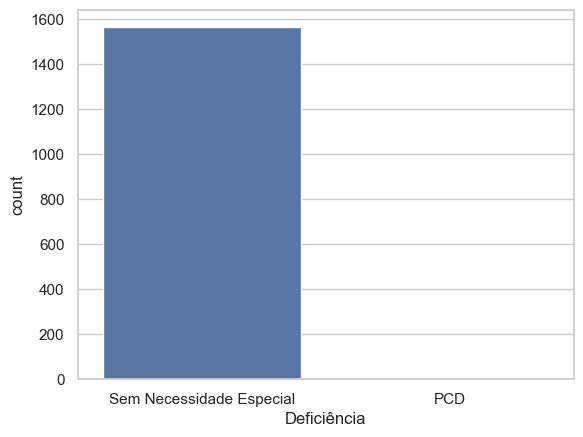

In [31]:
# O tópico de pessoas com deficiêcia (PCD) é importante para analisarmos o avanço do número geral desses alunos no campus 
# e muito importante para mostrar os avanços de acessibilidade do campus. No gráfico a seguir podemos ver a comparação de alunos PCD com alunos
# sem necessidades especiais.
sns.countplot(x = dados['Deficiência'])
plt.rcParams['xtick.labelsize'] = 8

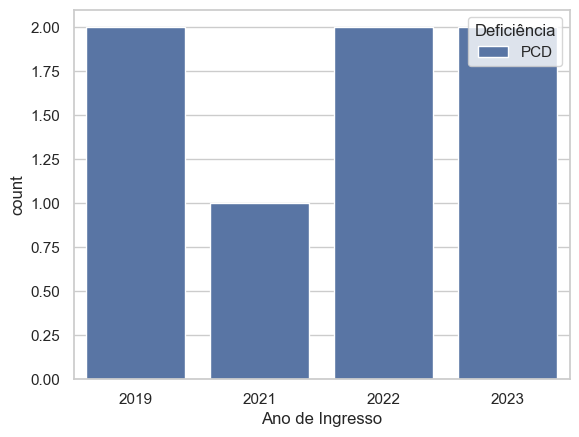

In [32]:
# A seguir será analisado a evolução no número de alunos PCD ao passar dos anos, mostrando um aumento substâncial nos anos de 
# dois mil e vinte um e vinte dois.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Def, x='Ano de Ingresso', hue='Deficiência')
plt.show()

In [33]:
dados_Def['Ano de Ingresso'].value_counts()

2022    2
2023    2
2019    2
2021    1
Name: Ano de Ingresso, dtype: int64

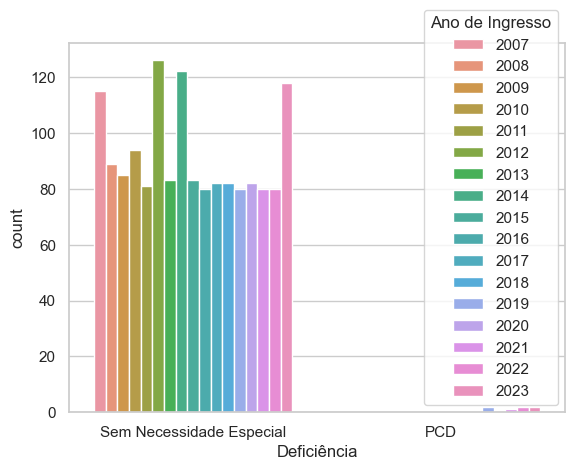

In [34]:
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Deficiência', hue='Ano de Ingresso')
plt.show()

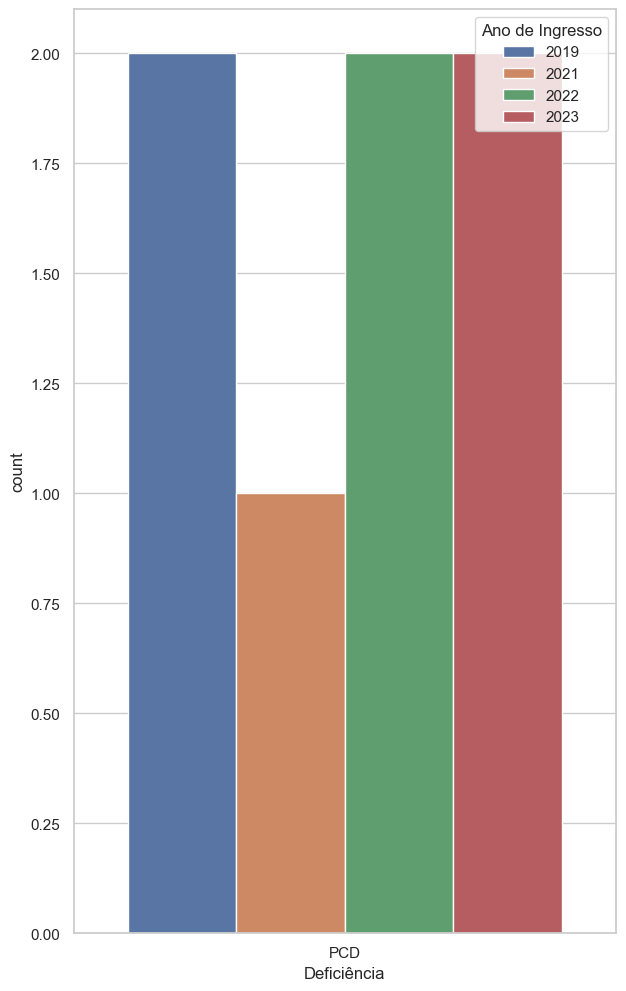

In [35]:
plt.figure(figsize= (7,12))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Def, x='Deficiência', hue='Ano de Ingresso')
plt.show()

# Regras de Associação

In [36]:
!pip install apyori

In [37]:
import pandas as pd
from apyori import apriori


In [38]:
dados_Evas = dados_Evas.drop(["Modalidade","Situação no Curso","Deficiência","Nacionalidade"],axis = 1)

In [83]:
dados_Evas = dados_Evas.drop(["Ano de Ingresso"],axis = 1)

In [39]:
dados_Evas = dados_Evas.drop(["Renda Per Capita"],axis = 1)

In [40]:
dados_Evas

,#,Ano de Ingresso,Descrição do Curso,Estado,Etnia/Raça/Cor,Forma de Ingresso,Sexo,Tipo de Escola de Origem
131,132,2011,TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO,SP,Não declarado,Ampla Concorrência (Vestibular),M,Pública
201,202,2009,TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO E...,NaN,Não declarado,Ampla Concorrência (Vestibular),M,Pública
234,235,2012,TÉCNICO EM ELETRÔNICA INTEGRADO AO ENSINO MÉDIO,SP,Não declarado,Ampla Concorrência (Vestibular),M,Pública
249,250,2008,TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO,SP,Não declarado,Ampla Concorrência (Vestibular),M,Privada
471,472,2012,TÉCNICO EM ELETRÔNICA INTEGRADO AO ENSINO MÉDIO,SP,Não declarado,Ampla Concorrência (Vestibular),M,Pública
...,...,...,...,...,...,...,...,...
11689,11690,2012,TÉCNICO EM ELETRÔNICA INTEGRADO AO ENSINO MÉDIO,SP,Não declarado,Ampla Concorrência (Vestibular),M,Pública
11700,11701,2011,TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO,SP,Não declarado,Ampla Concorrência (Vestibular),M,Pública
11757,11758,2011,TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO,SP,Não declarado,Ampla Concorrência (Vestibular),M,Pública
11792,11793,2008,TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO,SP,Não declarado,Ampla Concorrência (Vestibular),M,Pública


In [41]:
dados_Evas.shape

(73, 8)

In [42]:
dados.shape

(1569, 13)

In [84]:
Lista = []
for i in range(len(dados_Evas)):
  #print(i)
  #print(base_mercado1.values[i, 0])
  Lista.append([str(dados_Evas.values[i, j]) for j in range(dados_Evas.shape[1])])

In [88]:
regras = apriori(Lista, min_support = 0.04, min_confidence = 0.7, min_lift = 2)
resultados = list(regras)
len(resultados)

5

In [89]:
resultados

[RelationRecord(items=frozenset({'M', 'TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO ENSINO MÉDIO', 'Branca'}), support=0.0684931506849315, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Branca'}), items_add=frozenset({'TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO ENSINO MÉDIO', 'M'}), confidence=0.7142857142857143, lift=2.482993197278912)]),
 RelationRecord(items=frozenset({'M', 'Ampla Concorrência (Vestibular)', 'TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO ENSINO MÉDIO', 'Branca'}), support=0.0684931506849315, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Branca'}), items_add=frozenset({'Ampla Concorrência (Vestibular)', 'TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO ENSINO MÉDIO', 'M'}), confidence=0.7142857142857143, lift=2.482993197278912), OrderedStatistic(items_base=frozenset({'Ampla Concorrência (Vestibular)', 'Branca'}), items_add=frozenset({'TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO ENSINO MÉDIO', 'M'}), confidence=0.7142857142857143, lift=2.48299

In [46]:
dados_Form = dados.loc[dados['Situação no Curso'] == "Concluído"]

In [47]:
dados_Form = dados_Form.drop(["Modalidade","Situação no Curso","Deficiência","Nacionalidade"],axis = 1)

In [48]:
dados_Form = dados_Form.drop(["Renda Per Capita"],axis = 1)

In [49]:
dados_Form

,#,Ano de Ingresso,Descrição do Curso,Estado,Etnia/Raça/Cor,Forma de Ingresso,Sexo,Tipo de Escola de Origem
2,3,2015,TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO,SP,Parda,Escola Pública + PPI,M,Pública
24,25,2011,TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO,SP,Não declarado,Ampla Concorrência (Vestibular),F,Pública
30,31,2013,TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO,SP,Não declarado,Ampla Concorrência (Vestibular),F,Pública
34,35,2012,TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO E...,SP,Não declarado,Ampla Concorrência (Vestibular),M,Pública
35,36,2010,TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO E...,SP,Não declarado,Ampla Concorrência (Vestibular),M,Pública
...,...,...,...,...,...,...,...,...
11891,11892,2010,TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO,SP,Não declarado,Ampla Concorrência (Vestibular),F,Pública
11892,11893,2016,TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO,SP,Branca,Escola Pública + Renda,F,Pública
11903,11904,2017,TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO E...,SP,Branca,Ampla Concorrência (Vestibular),M,Pública
11905,11906,2015,TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO E...,SP,Amarela,Ampla Concorrência (Vestibular),M,Pública


In [90]:
Lista = []
for i in range(len(dados_Form)):
  #print(i)
  #print(base_mercado1.values[i, 0])
  Lista.append([str(dados_Form.values[i, j]) for j in range(dados_Form.shape[1])])

In [92]:
regras = apriori(Lista, min_support = 0.015, min_confidence = 1, min_lift = 2)
resultados = list(regras)
len(resultados)

8

In [93]:
resultados

[RelationRecord(items=frozenset({'F', 'Parda', 'Escola Pública + Renda + PPI'}), support=0.015990159901599015, ordered_statistics=[OrderedStatistic(items_base=frozenset({'F', 'Escola Pública + Renda + PPI'}), items_add=frozenset({'Parda'}), confidence=1.0, lift=6.112781954887218)]),
 RelationRecord(items=frozenset({'Parda', 'Escola Pública + Renda + PPI', 'TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO'}), support=0.015990159901599015, ordered_statistics=[OrderedStatistic(items_base=frozenset({'TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO', 'Escola Pública + Renda + PPI'}), items_add=frozenset({'Parda'}), confidence=1.0, lift=6.112781954887218)]),
 RelationRecord(items=frozenset({'F', 'Parda', 'Escola Pública + Renda + PPI', 'Pública'}), support=0.015990159901599015, ordered_statistics=[OrderedStatistic(items_base=frozenset({'F', 'Escola Pública + Renda + PPI'}), items_add=frozenset({'Parda', 'Pública'}), confidence=1.0, lift=6.452380952380952), OrderedStatistic(items_base=frozenset({'F'